<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ARIMA Lab

_Authors: Joseph Nelson (DC)_

---

## Introduction

> ***Note:*** _This can be a pair programming activity or done independently._

The most common application for AR, ARMA, and ARIMA models is inventory planning. Planning inventory for a small shop can be difficult enough, but you've just been hired to plan inventory for a _big_ store - Walmart

In this lab, you will be analyzing weekly Walmart sales data over a two year period from 2010 to 2012. The data is separated by store and by department, but you should focus on analyzing one store for simplicity. Your supervisor has set out the following goals for this project:

1. Record any observed trends in the data.
1. Produce a trained model to predict future sales numbers.
1. Include useful AND COMMENT ON how graphs (ACF, PACF) impact your modelling decisions throughout your notebook.

Try your best to tune your model. It can be difficult, but don't worry - timeseries analysis is just a difficult and specialized topic.

## Exercise
---

#### Requirements

- Assemble observations and graphs as well as timeseries models in a notebook.


#### Additional Resources

1. [ARMA Example](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma.html)
2. [ARMA Models for TSA](https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-1)

First, we need to setup our prerequisite DataFrame that will be used through the rest of the lab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('./datasets/train.csv')
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### 1. Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [2]:
store1 = data[data['Store'] == 1]

In [3]:
store1['Weekly_Sales'].sum()

222402808.85000002

In [4]:
store1_agg = pd.DataFrame(store1['Weekly_Sales'].groupby(store1.index).sum())

In [5]:
store1_agg

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
2010-03-12,1439541.59
2010-03-19,1472515.79
2010-03-26,1404429.92
2010-04-02,1594968.28


#### 2. Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

In [6]:
store1.index = pd.to_datetime(store1.index)

In [7]:
annual = store1['Weekly_Sales'].resample('W').mean().rolling(window=3, center=False).mean()
annual.head()

Date
2010-02-07             NaN
2010-02-14             NaN
2010-02-21    22467.677965
2010-02-28    21488.756686
2010-03-07    20986.675753
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

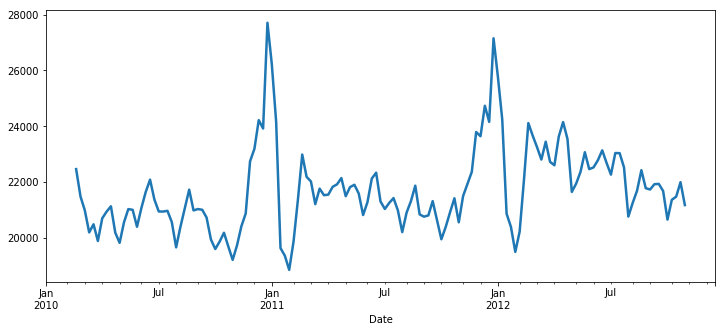

In [8]:
# Clear seasonal trend
annual.plot(lw=2.5, figsize=(12,5));

#### 3. Compute the 1, 2, 52 autocorrelations for Weekly_Sales and create an autocorrelation and partial autocorrelation plot.

In [9]:
print('ac1:',store1['Weekly_Sales'].autocorr())
print('ac2:',store1['Weekly_Sales'].autocorr(2))
print('ac52:',store1['Weekly_Sales'].autocorr(52))

ac1: 0.9685711543841523
ac2: 0.9550086557588764
ac52: 0.8119746276802181


In [10]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

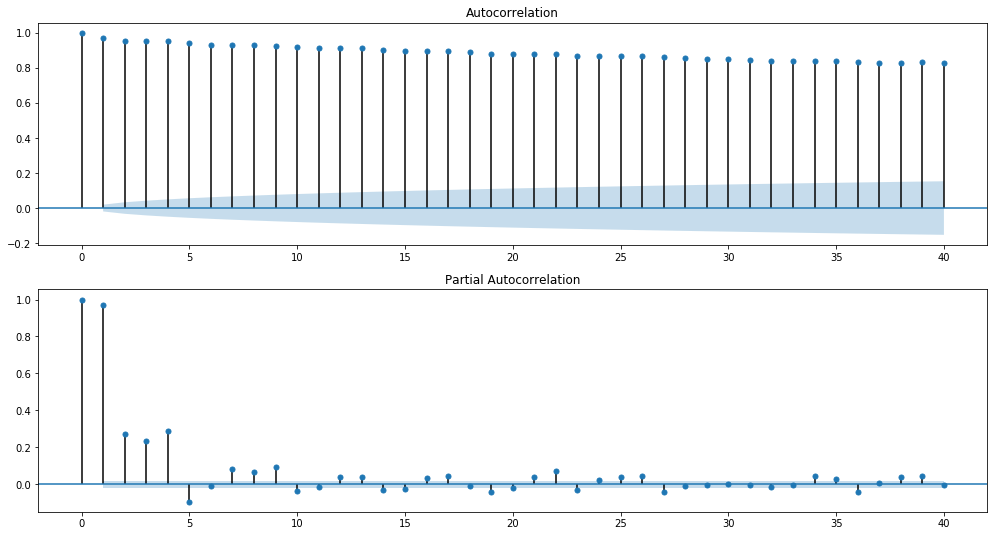

In [11]:
fig = plt.figure(figsize=(17,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(store1['Weekly_Sales'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(store1['Weekly_Sales'], lags=40, ax=ax2)
plt.show()

##### 4. [BONUS]: What do the acf() and pacf() plots say about the type of model you want to build?

AR with p(5) should fit well given that the 5th lag of the pacf plot crosses into the confidence threshold

#### 5. Split the weekly sales data in a training and test set - using the first 75% of the data for training.

In [12]:
split = int(len(store1_agg['Weekly_Sales']) * .75)

In [20]:
train = store1_agg['Weekly_Sales'][:split]
test = store1_agg['Weekly_Sales'][split:]

#### 6. "Difference" the data by converting the sales into change in sales (diff function is convenient for doing this.)

In [14]:
diff1 = pd.Series(np.diff(store1_agg['Weekly_Sales']), index=store1_agg.index[1:])

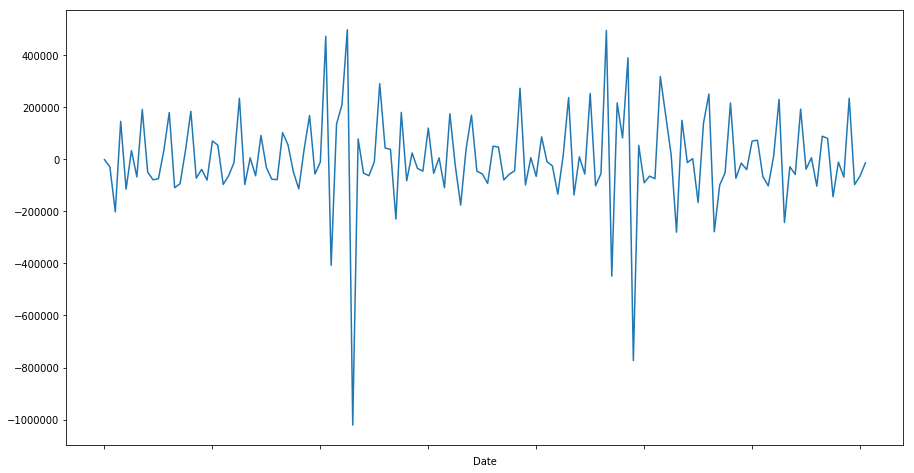

In [15]:
diff1.plot(figsize=(15,8));

#### 7. Create an AR(1) model on the training data and compute the mean absolute error of the predictions. How effective is this model?

In [16]:
from statsmodels.tsa.arima_model import AR, ARIMA, ARMA

In [38]:
ar1 = AR(train.values, train.index).fit()

/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [39]:
# not sure why it doesn't work
ar1.summary()

In [46]:
preds = ar1.predict(test.index[0], test.index[len(test) - 1])

In [47]:
preds

array([1795228.10714292, 1766495.7297176 , 1622400.28193731,
       1613063.83727759, 1544992.60960354, 1513261.11423744,
       1486362.75532597, 1577041.86981068, 1558382.23804311,
       1569340.66506128, 1606072.69483   , 1630835.38972133,
       1594763.31066861, 1587158.9399526 , 1586802.384377  ,
       1561910.24483898, 1545662.45927638, 1555010.63303531,
       1550563.48947547, 1551544.43043052, 1563093.82933677,
       1571660.41953243, 1563951.31722853, 1570319.72595791,
       1571610.36511783, 1563623.57893903, 1558178.80937075,
       1561328.24821122, 1557566.03575113, 1554007.43735002,
       1557778.38631106, 1559853.2023931 , 1558155.97266883,
       1560258.65311007, 1562204.01296244, 1560376.90664805])

In [48]:
from sklearn.metrics import mean_absolute_error as mae

In [49]:
mae(test.values, preds)

79376.32778110587

In [53]:
#~95% accurate
mae(test.values, preds) / np.mean(store1_agg['Weekly_Sales'])

0.05103719207230749

#### 8. Plot the residuals - where are their significant errors?

In [54]:
rs = test.values - preds

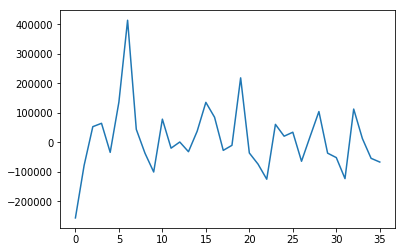

In [61]:
plt.plot(rs);

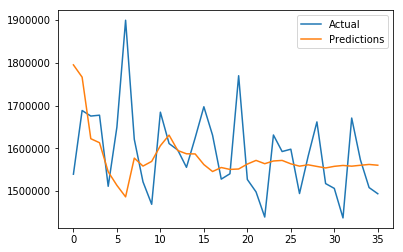

In [65]:
# Accuracy on day 5 is particularly abysmal
plt.plot(test.values, label='Actual')
plt.plot(preds, label='Predictions')
plt.legend();

#### 9. Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set?

In [67]:
# Both perform worse
ar2 = ARMA(train.values, (2,0), dates=train.index).fit()
ar2preds = ar2.predict(test.index[0], test.index[len(test) - 1])
print('AR(2) MAE:', mae(test.values, ar2preds))

arma22 = ARMA(train.values, (2,2), dates=train.index).fit()
arma22preds = arma22.predict(test.index[0], test.index[len(test) - 1])
print('ARMA(2, 2) MAE:', mae(test.values, arma22preds))

/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


AR(2) MAE: 81203.23953243696
ARMA(2, 2) MAE: 80502.67069010304


#### 10. Assemble your findings, including any useful graphs.

In [68]:
# Testing my earlier prediction that AR(5) would fit well:
ar5 = ARMA(train.values, (5, 0), dates=train.index).fit()
ar5preds = ar5.predict(test.index[0], test.index[len(test) - 1])
print('AR(5) MAE:', mae(test.values, ar5preds))

/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


AR(5) MAE: 78545.0921071404


In [ ]:
# Minor success!